In [1]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub


print("GPU available: ", tf.config.list_physical_devices('GPU'))
!pip install tensorflow_hub
!pip install opencv-python

from matplotlib import pyplot as plt
import numpy as np
import cv2

TF Version:  2.8.0
TF Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  []


Pre trained weights

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocessing

In [3]:

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image
def load_image(img_path,image_size=(256, 256), preserve_aspect_ratio=True):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    img = crop_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img
  
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


Content image and style image

In [21]:
output_image_size = 1000
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)
content_image = load_image('b.jpg', content_img_size)
style_image = load_image('j.jpg', style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')


In [33]:
content_image.shape

TensorShape([1, 1900, 1900, 3])

Content image

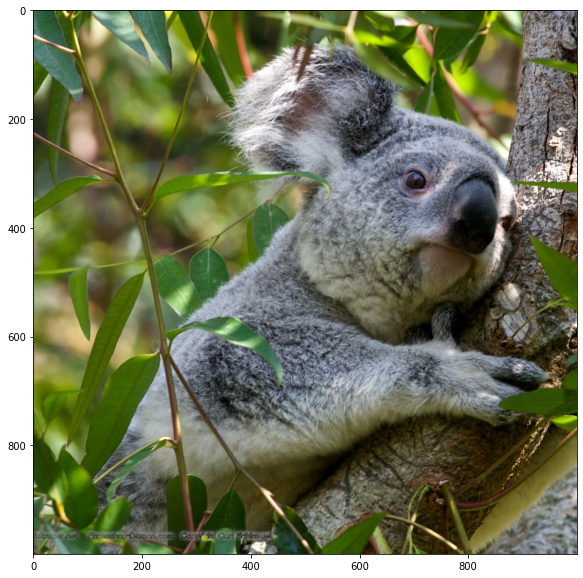

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(np.squeeze(content_image))
plt.show()

Style Image

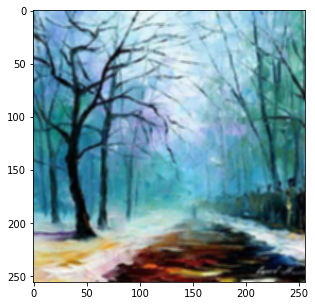

In [27]:
plt.figure(figsize = (10,5))
plt.imshow(np.squeeze(style_image))
plt.show()

In [23]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

Output image

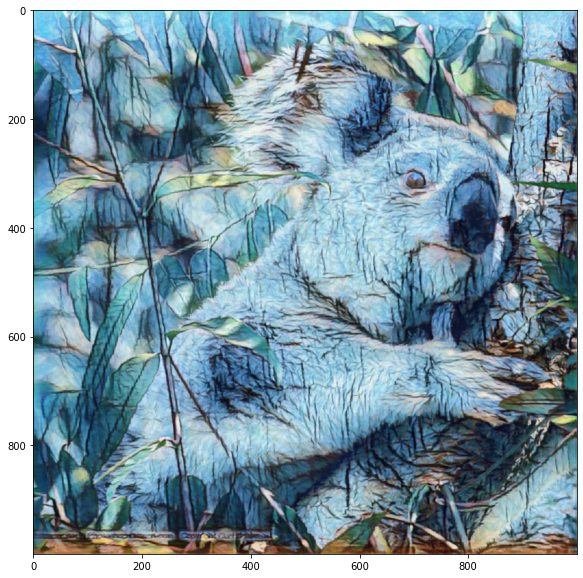

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(np.squeeze(stylized_image))

plt.show()